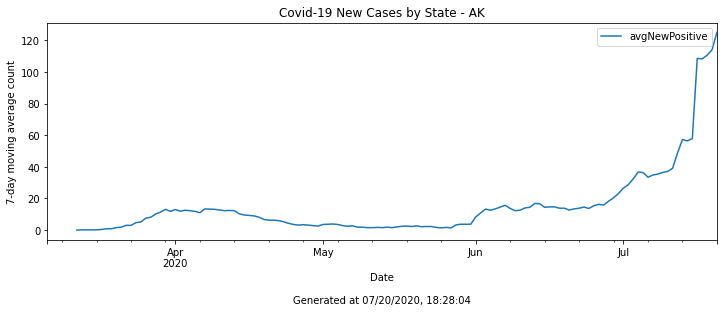

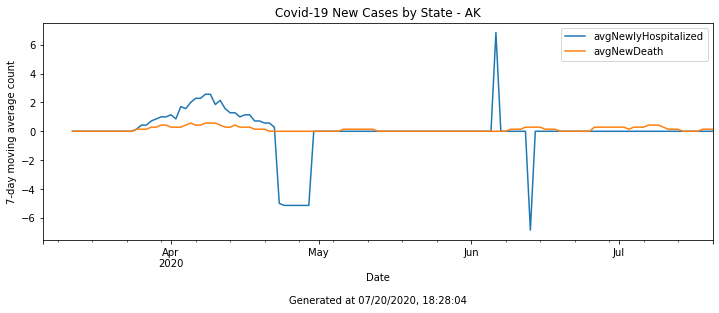

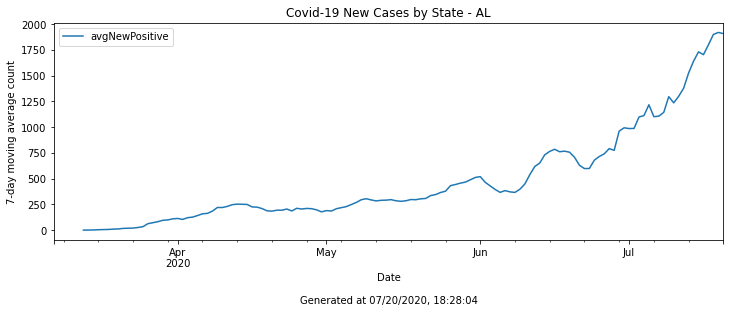

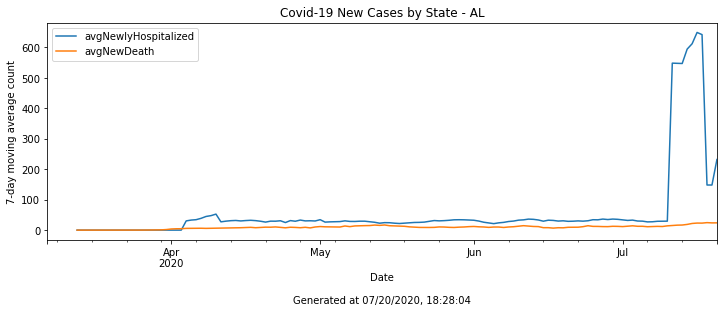

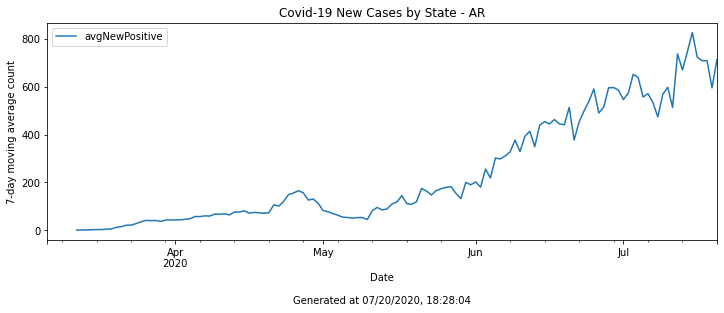

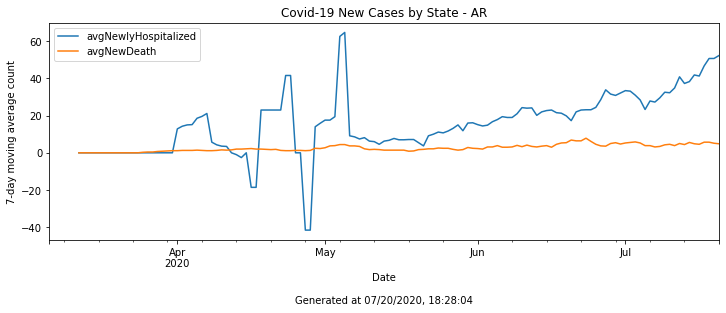

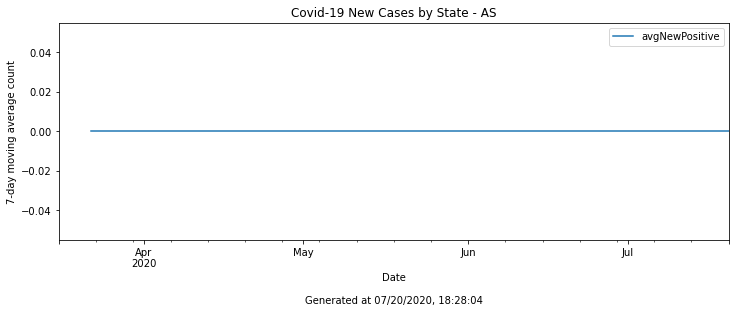

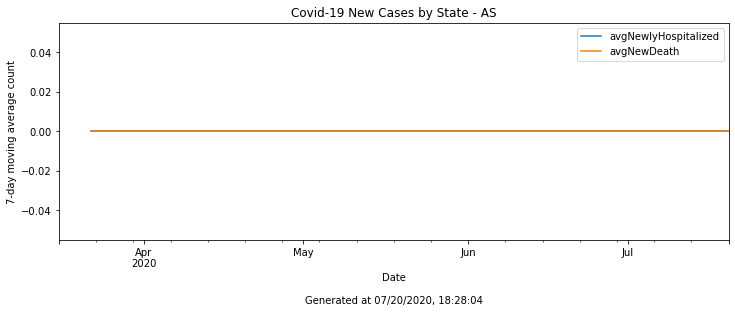

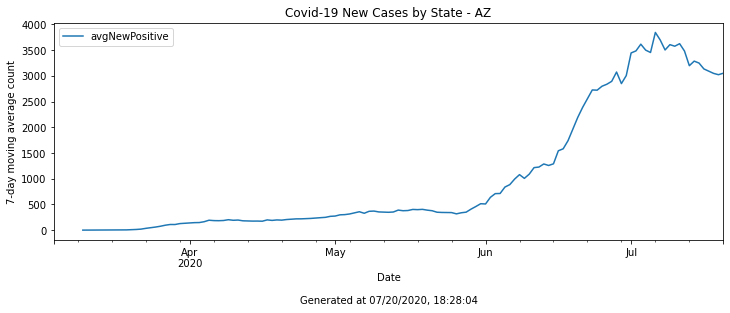

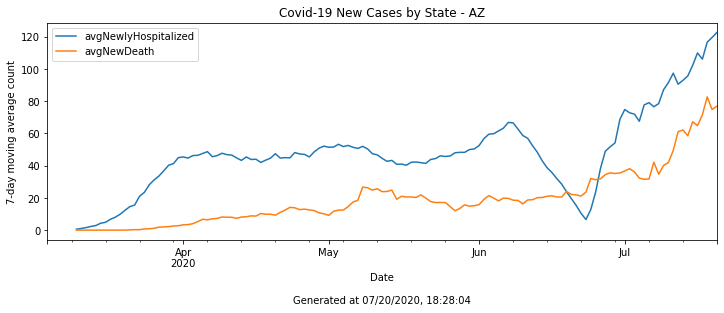

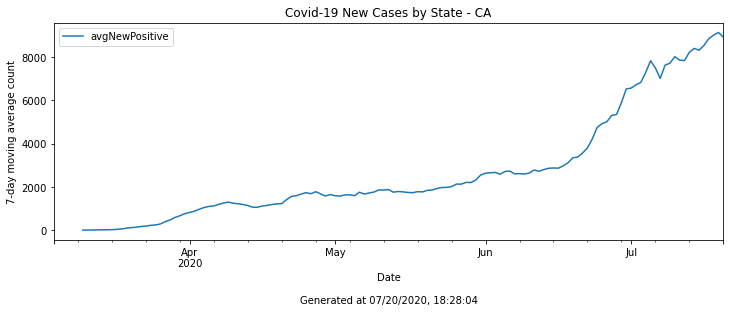

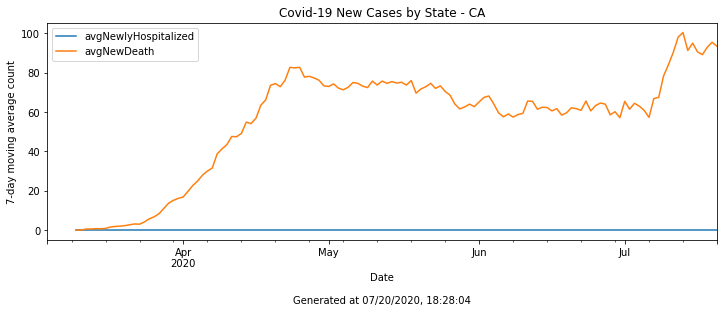

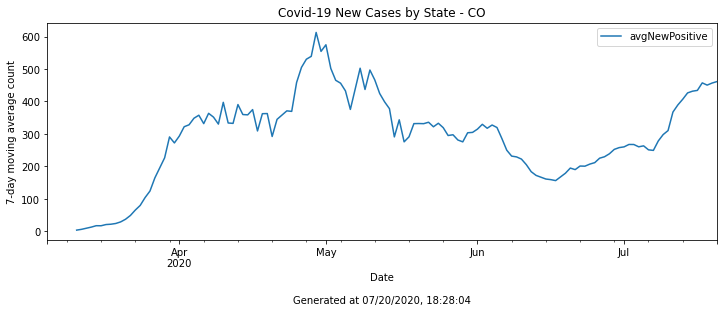

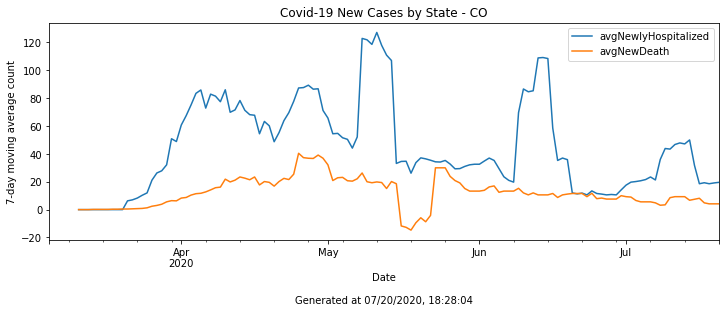

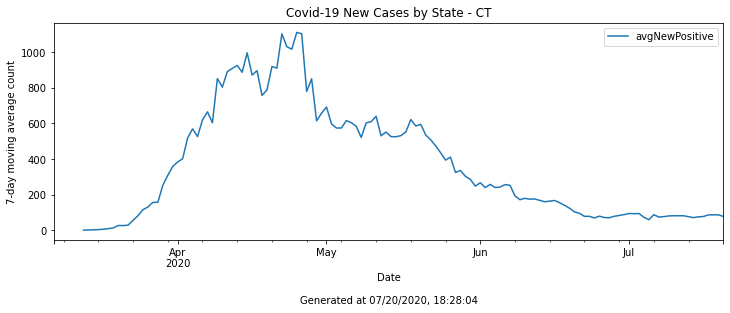

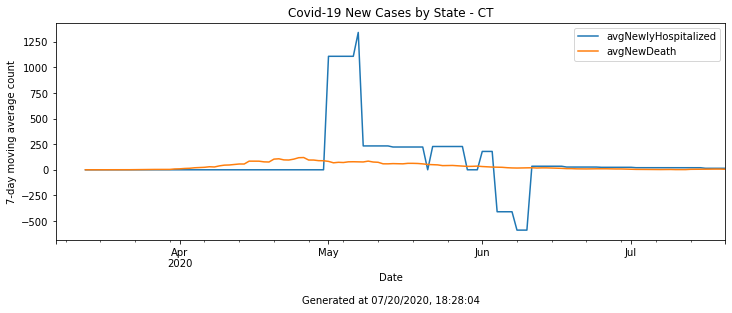

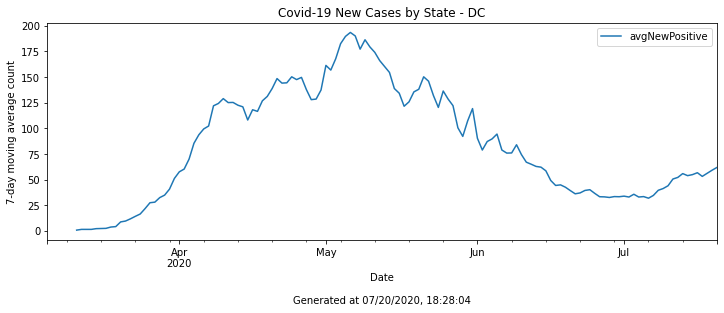

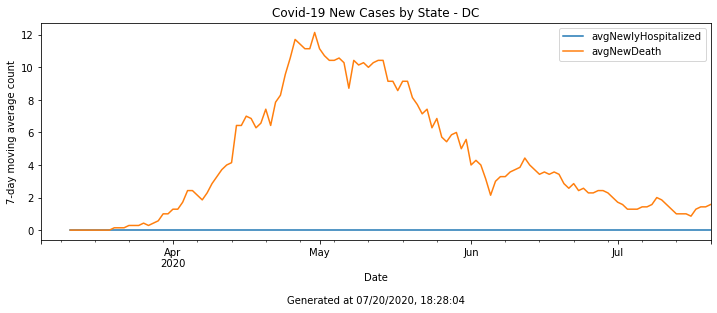

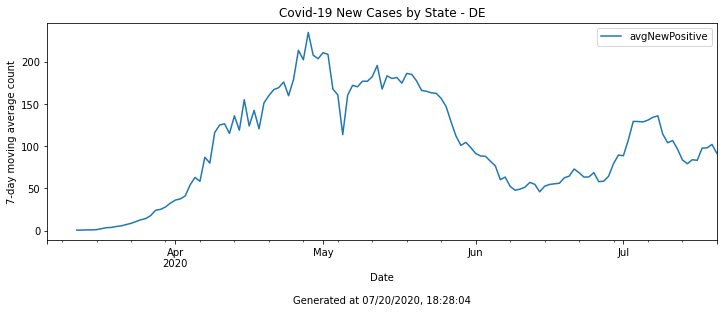

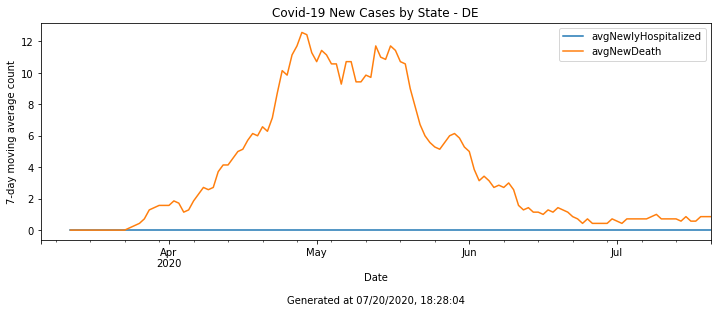

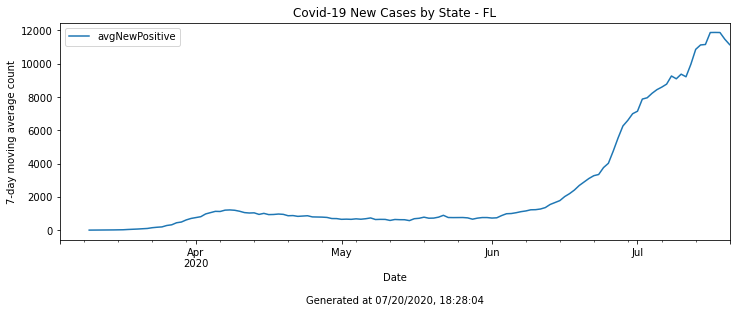

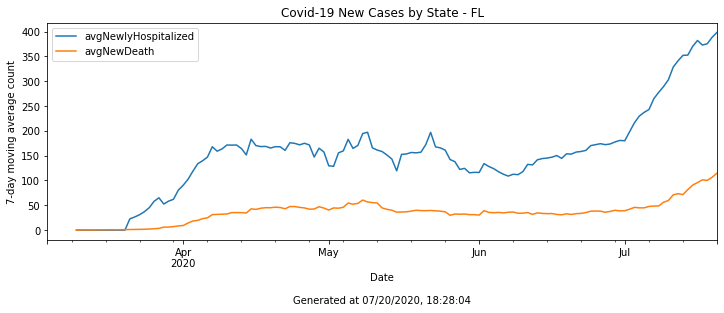

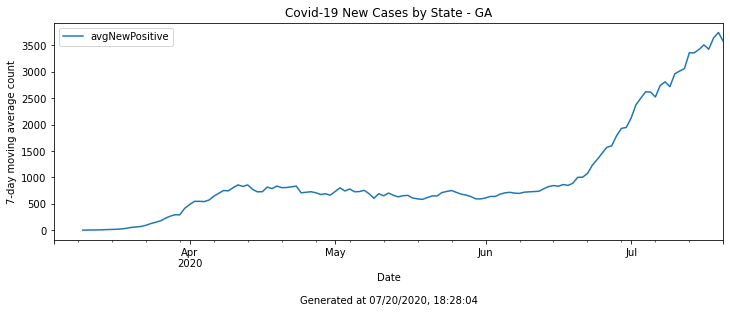

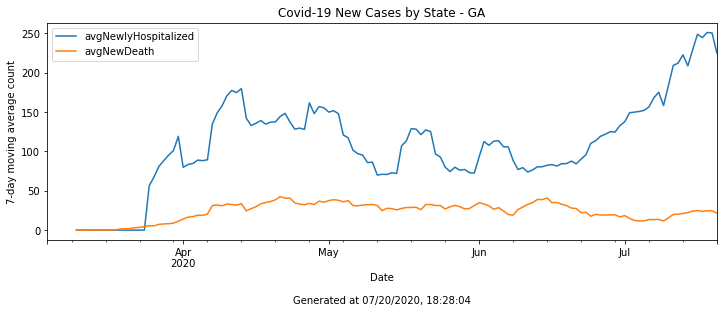

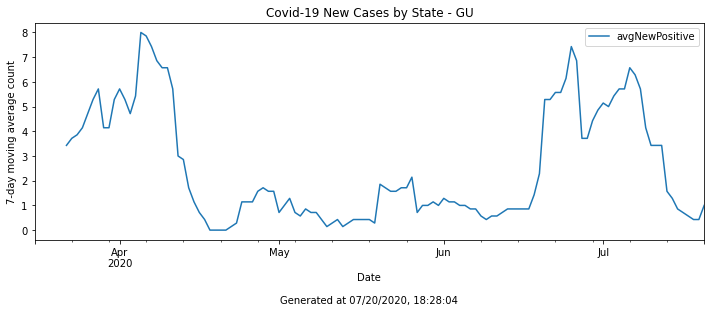

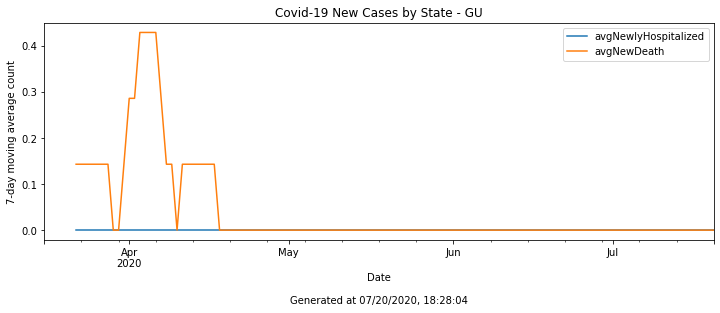

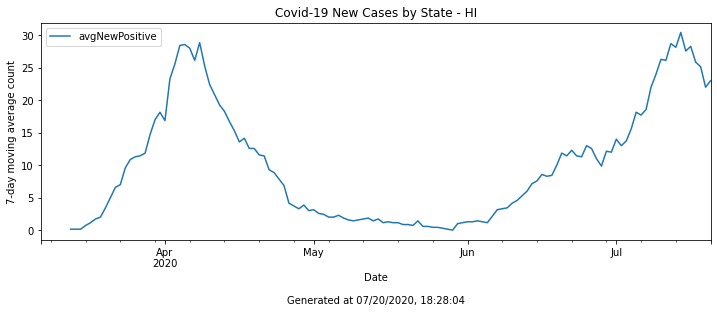

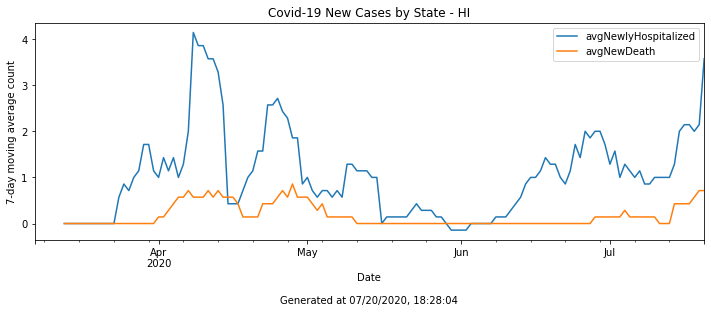

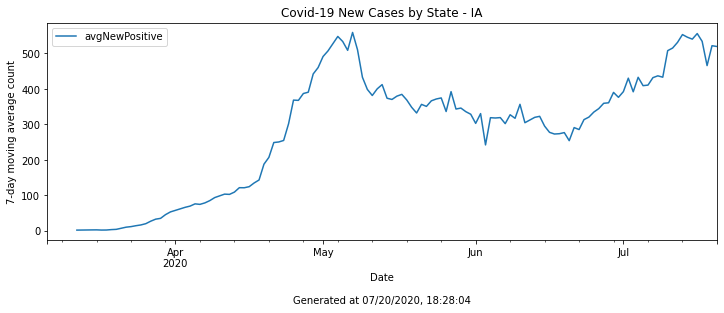

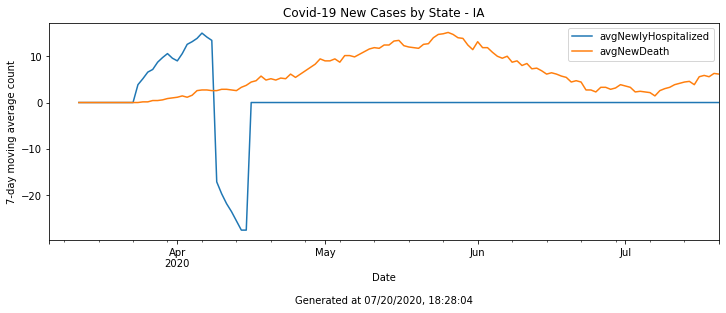

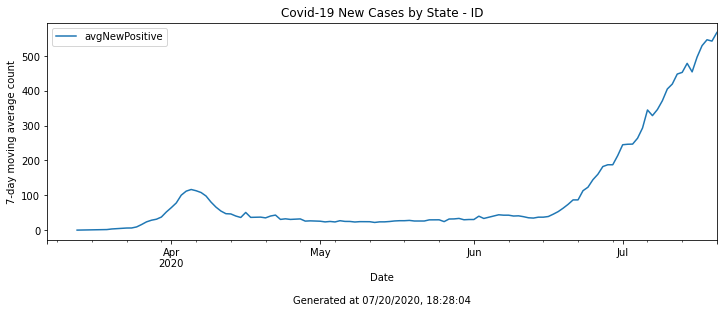

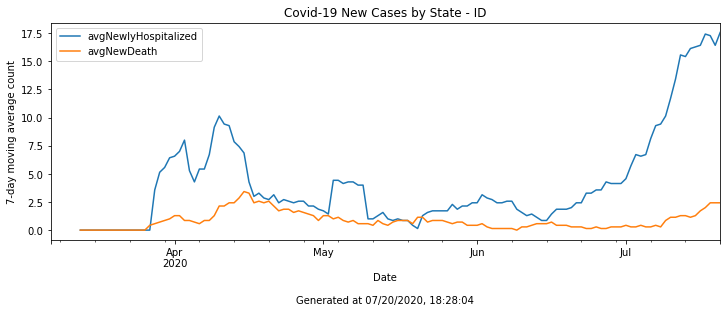

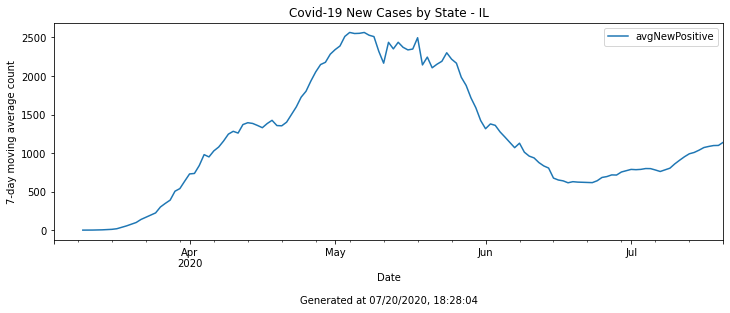

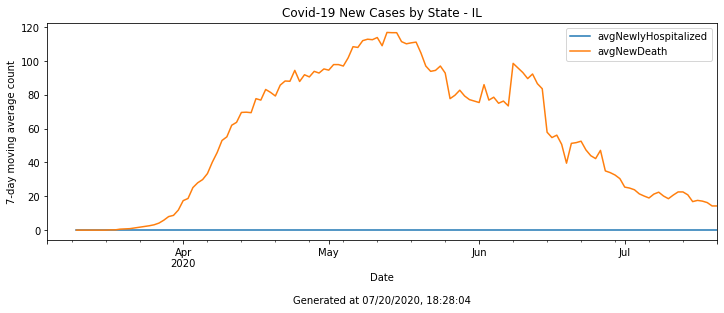

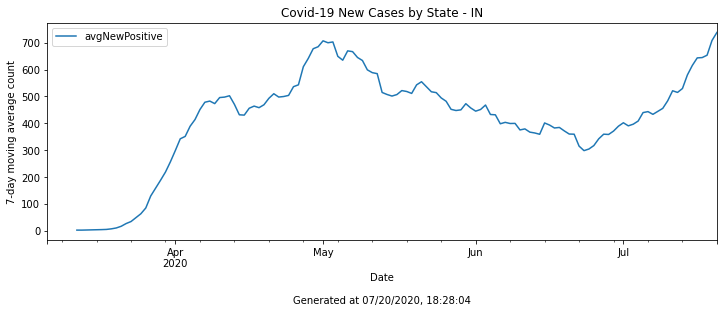

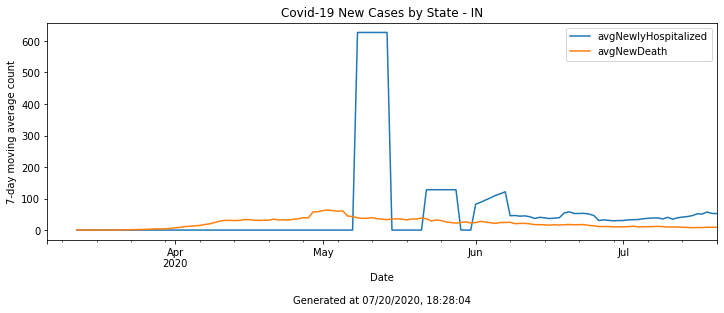

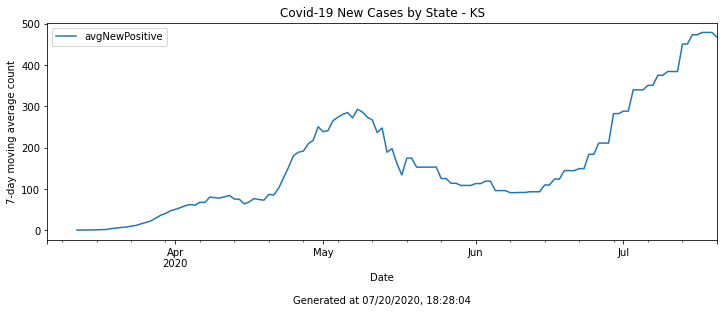

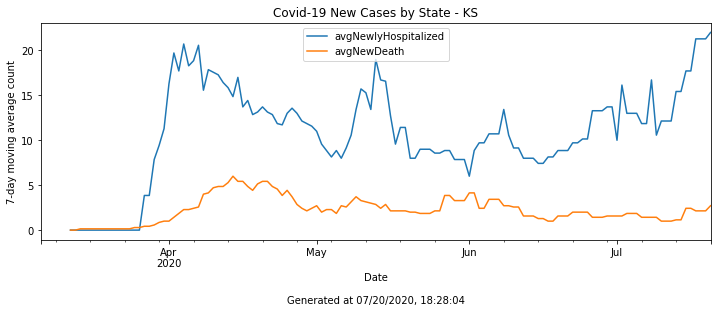

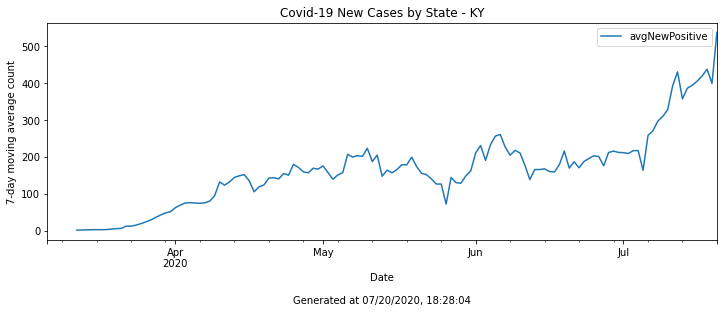

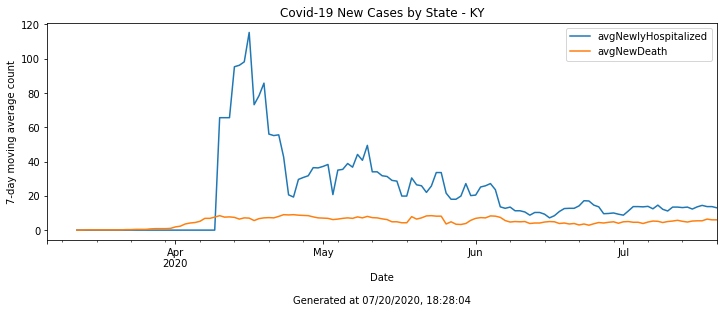

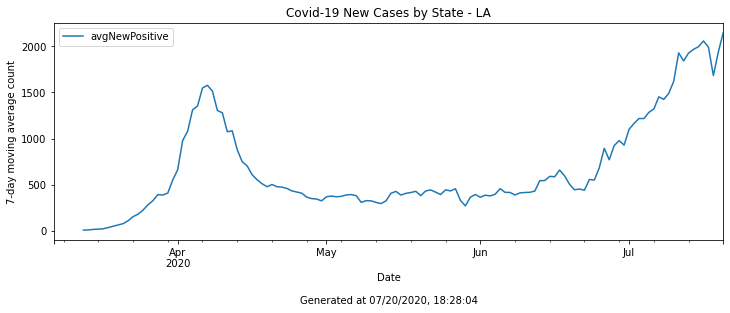

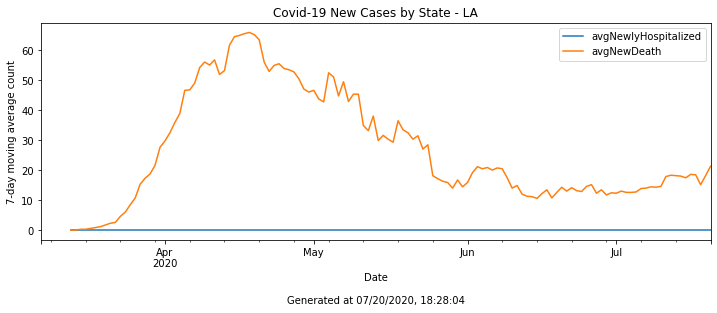

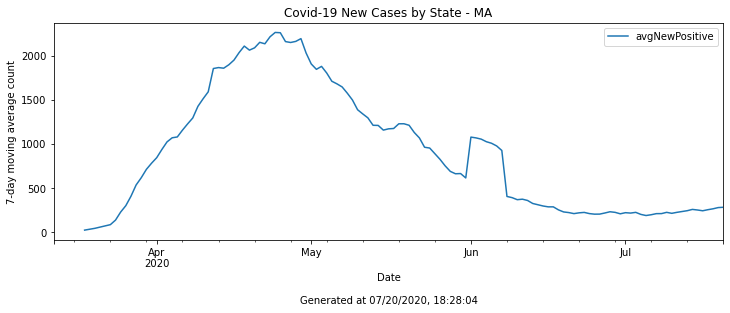

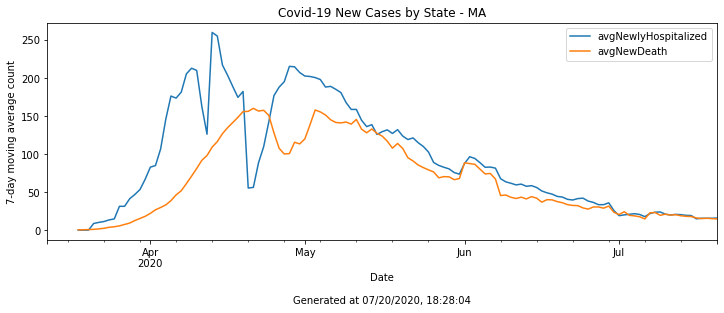

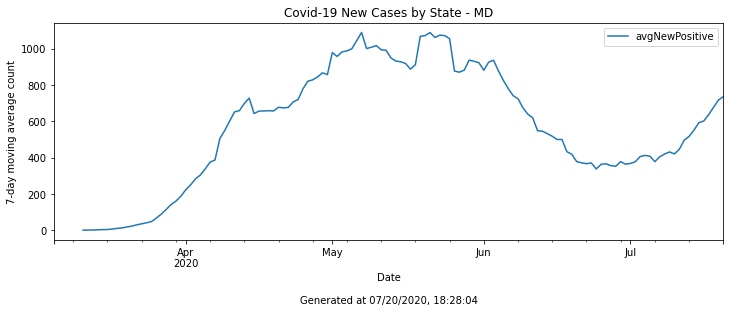

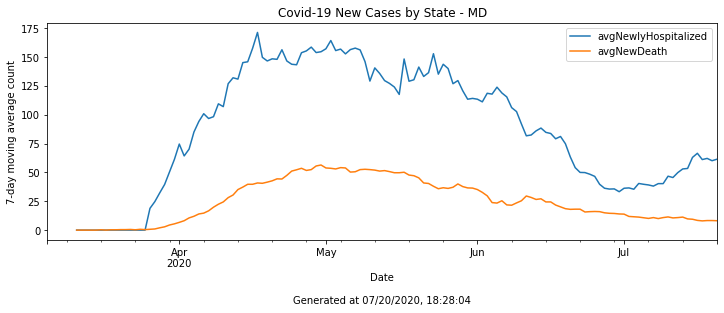

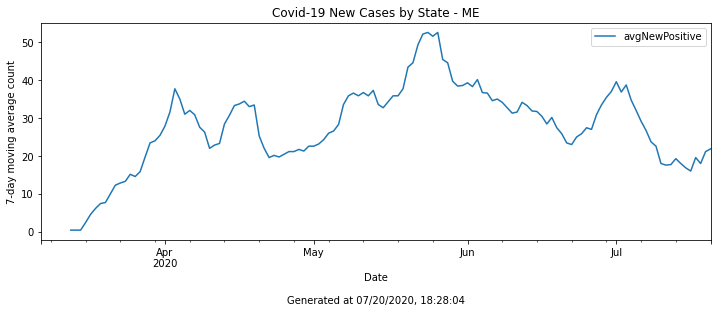

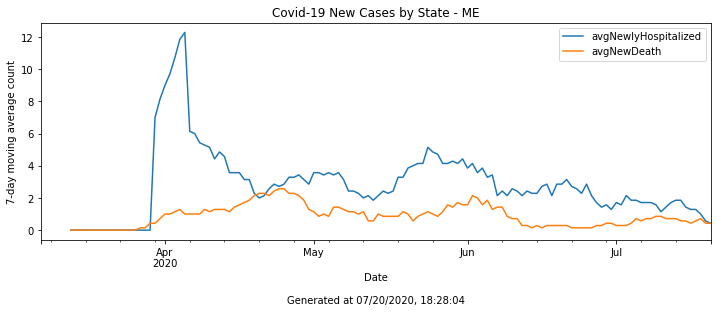

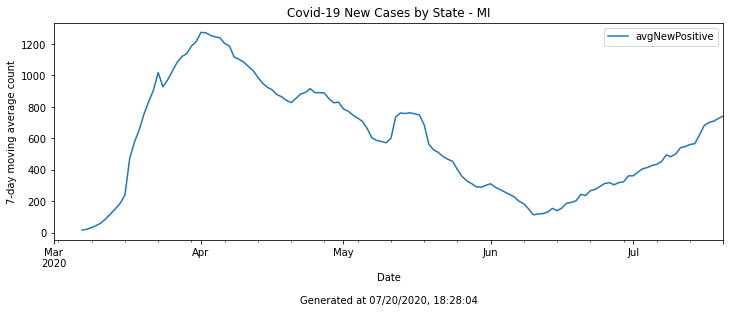

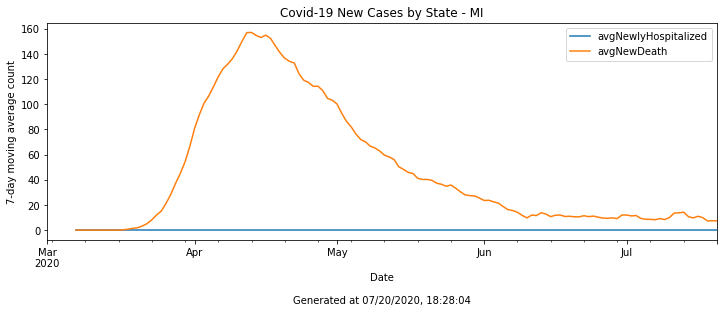

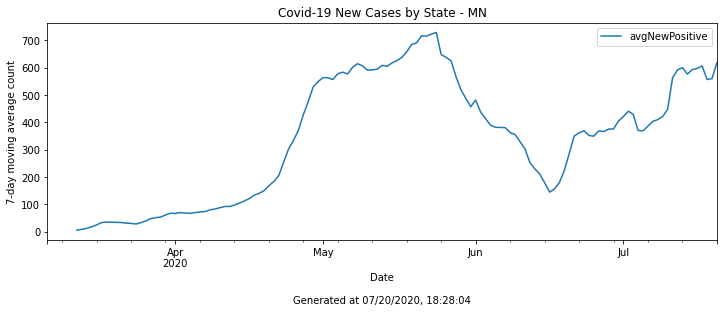

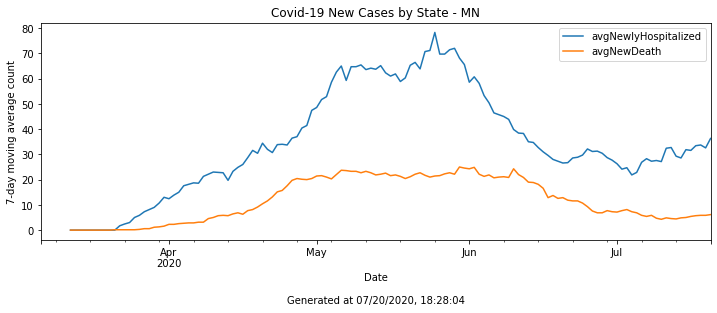

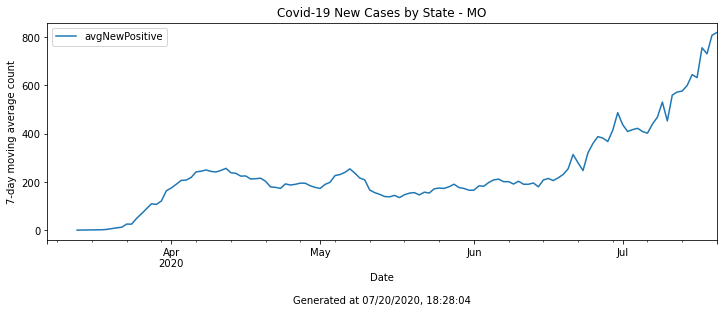

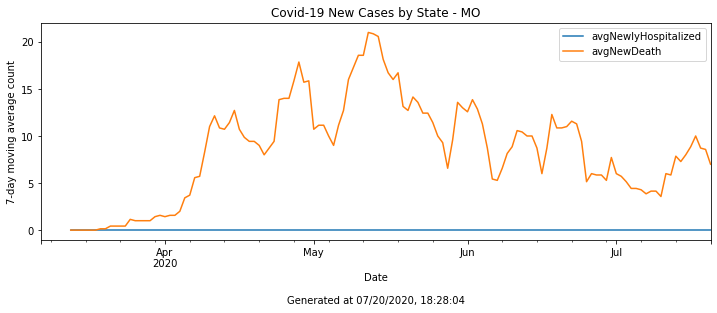

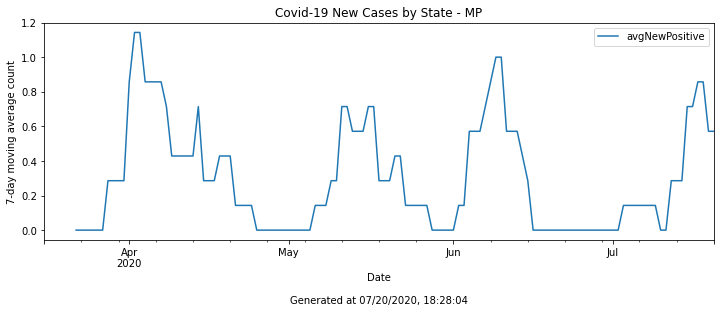

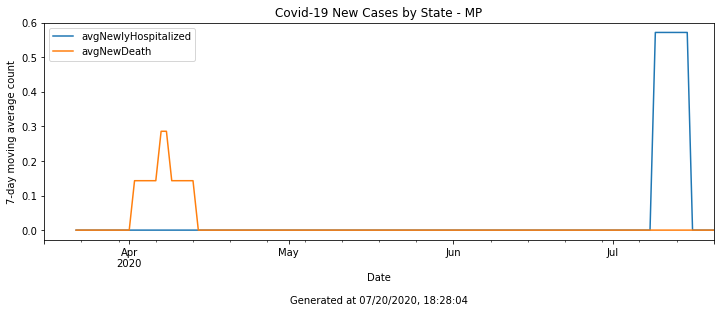

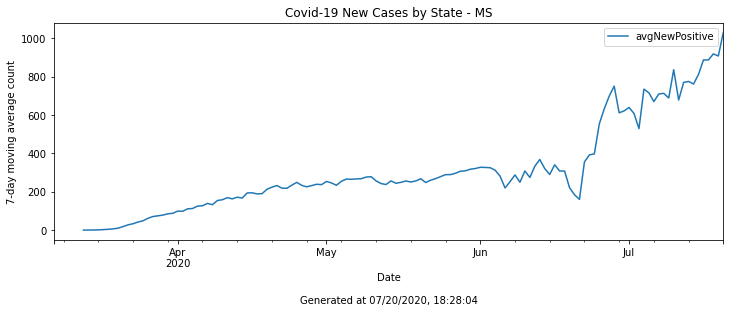

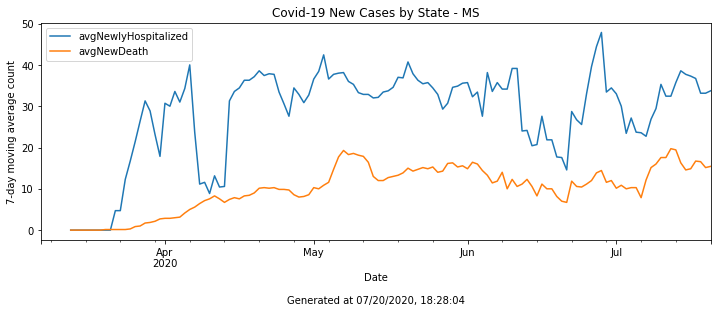

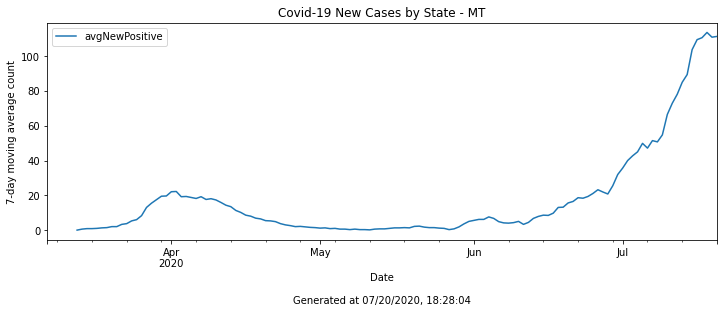

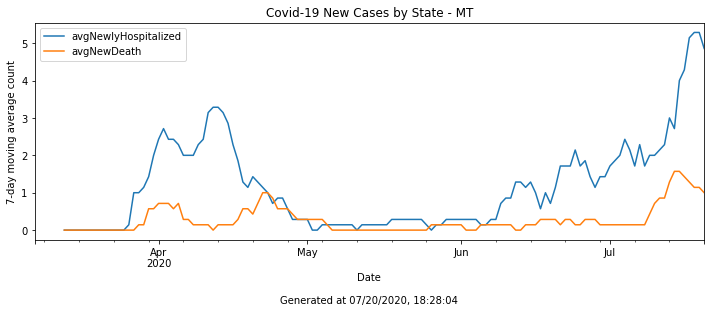

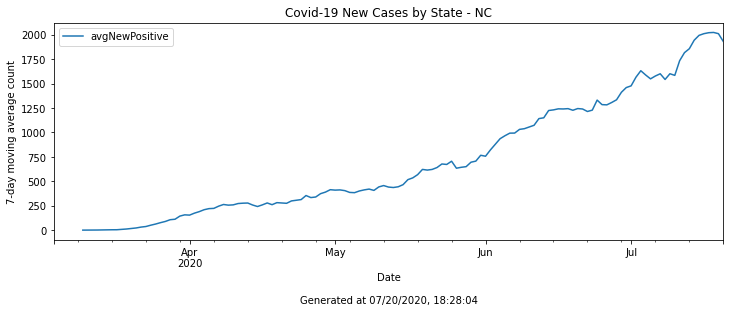

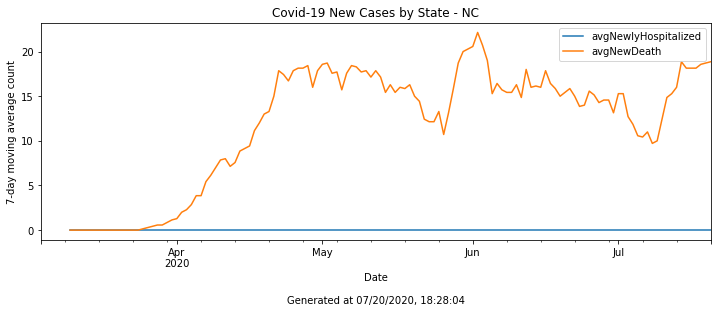

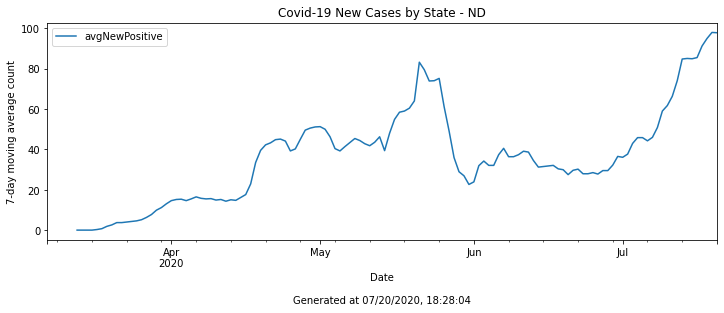

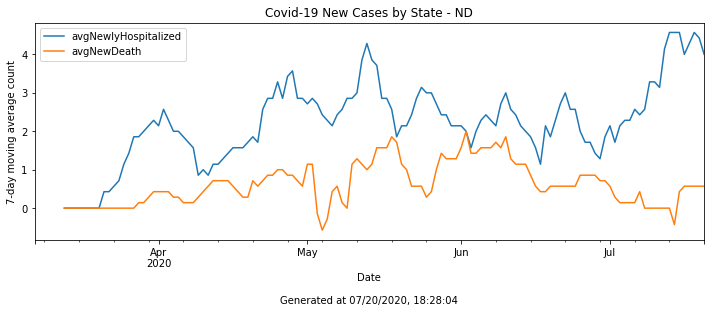

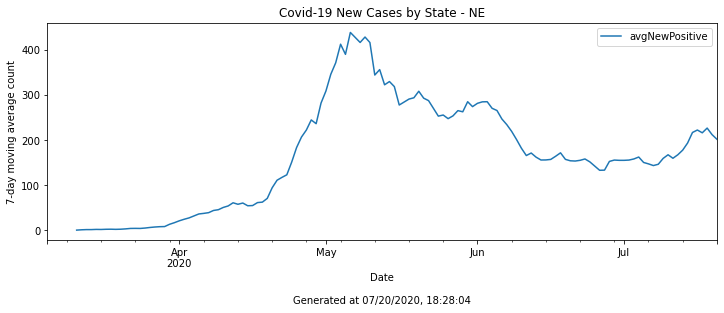

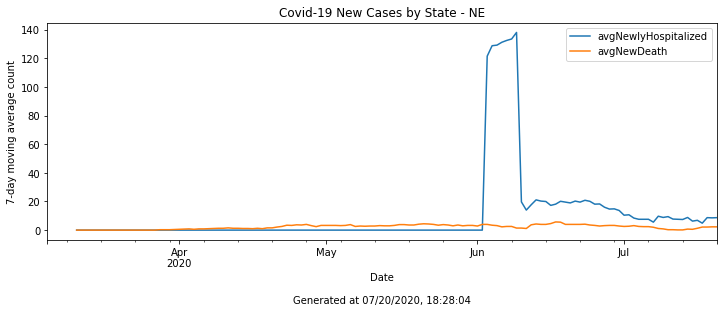

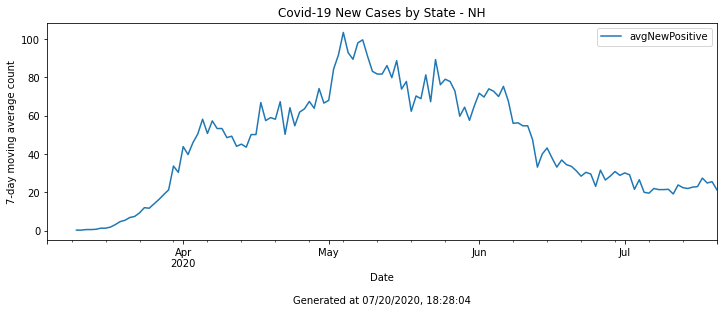

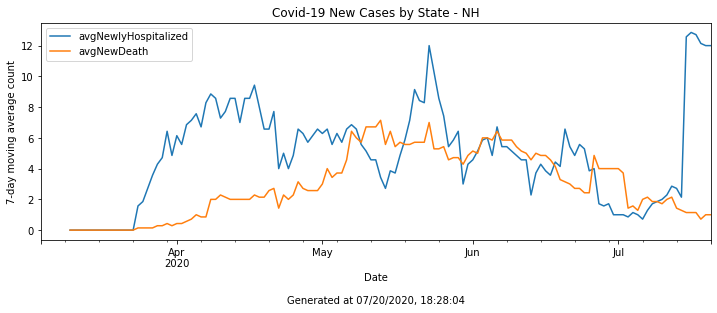

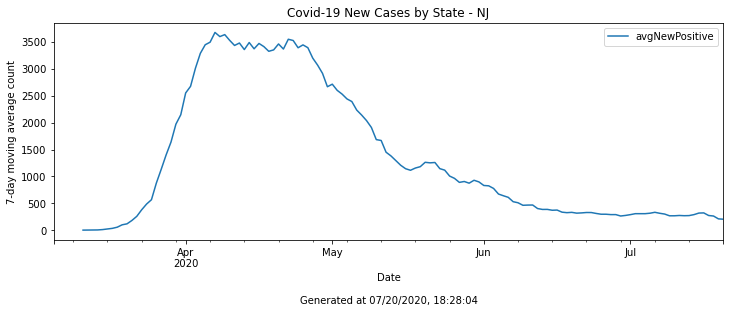

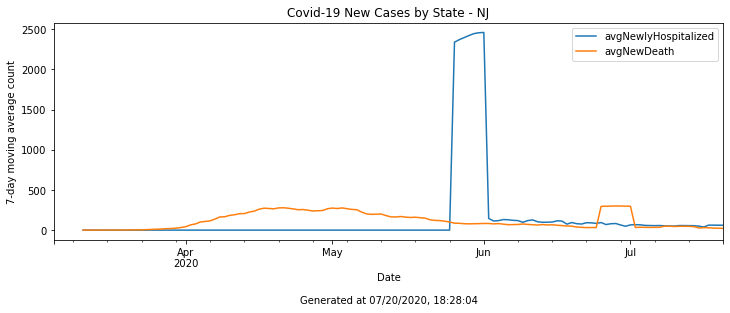

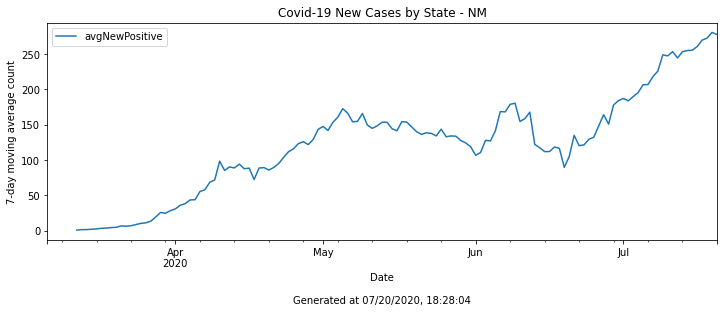

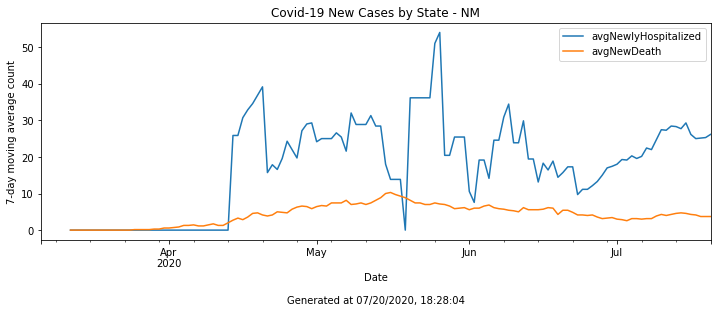

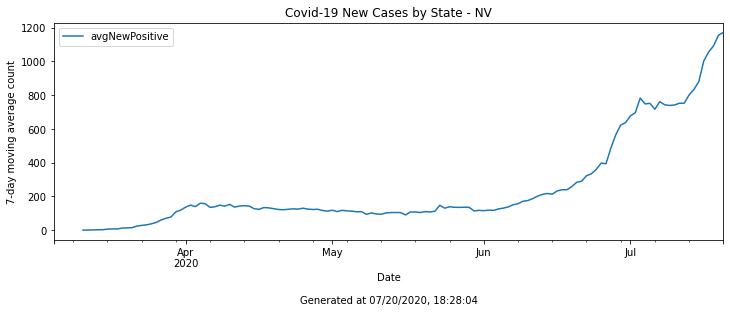

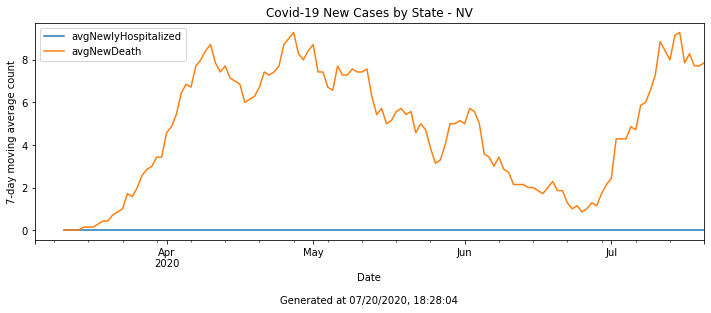

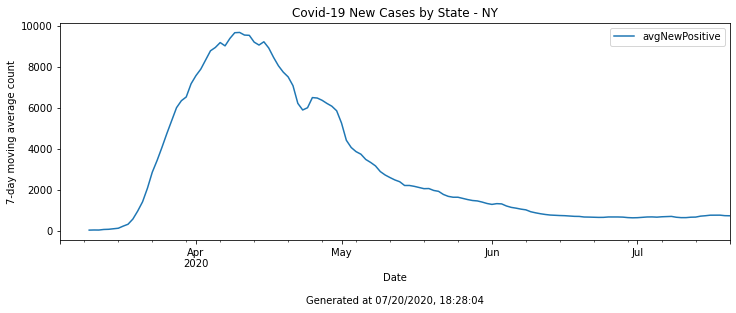

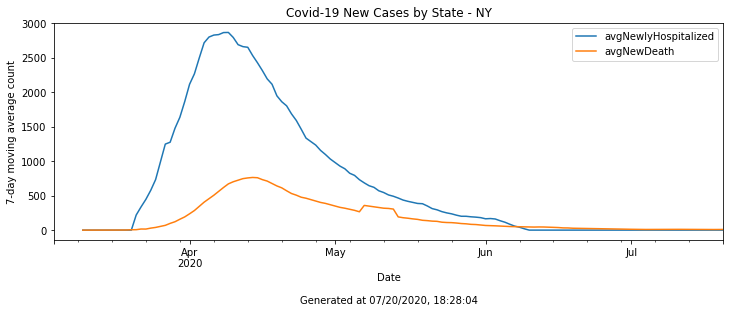

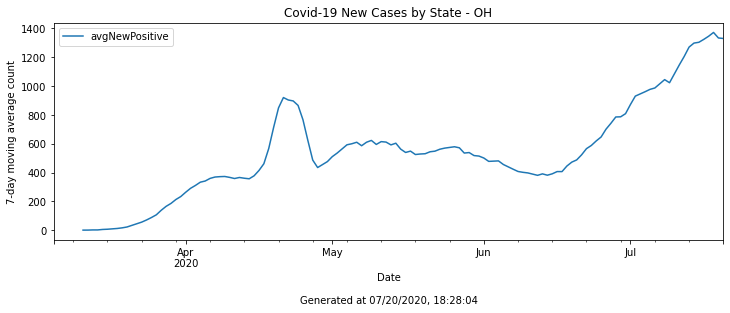

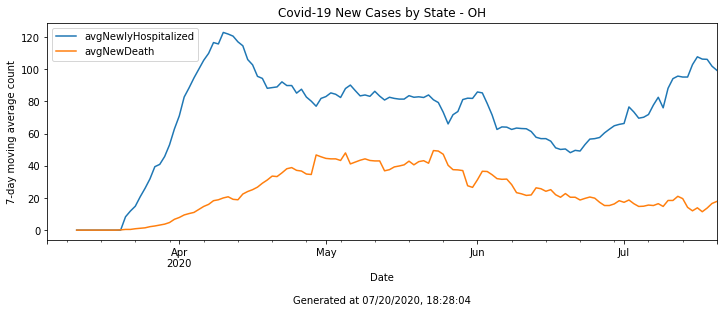

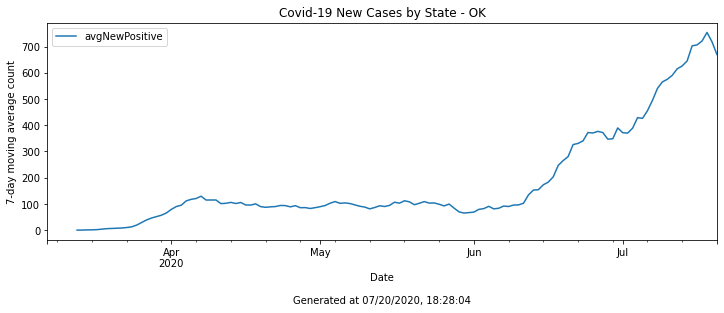

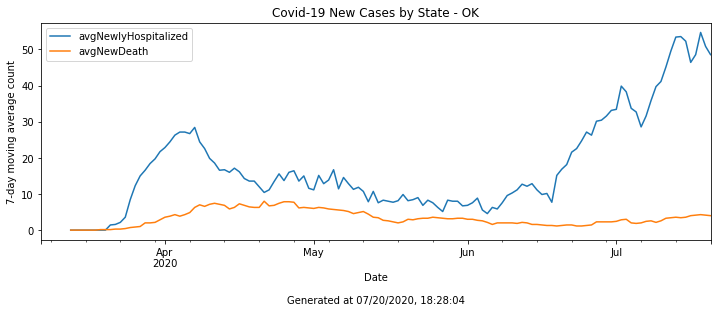

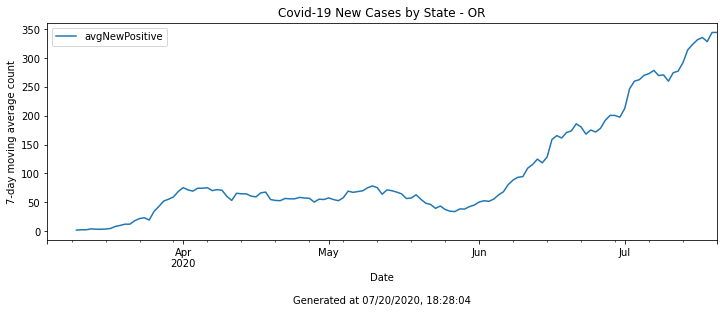

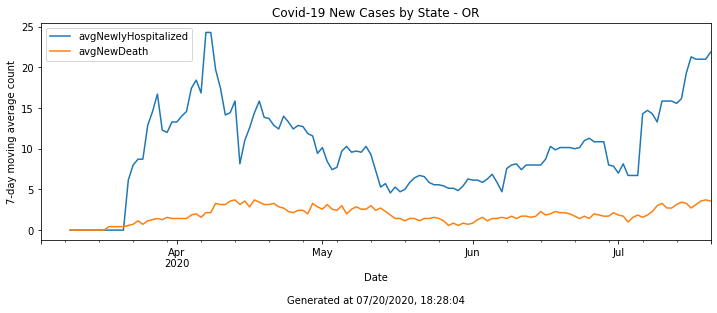

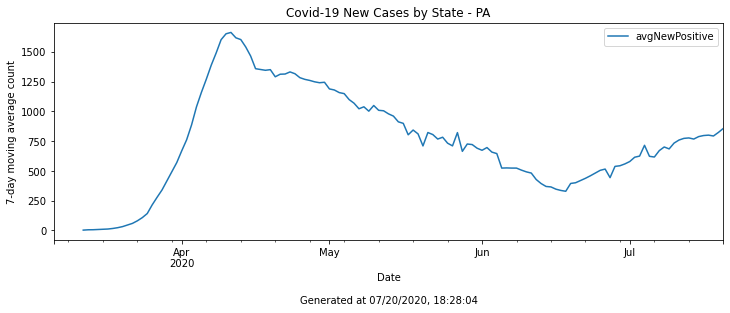

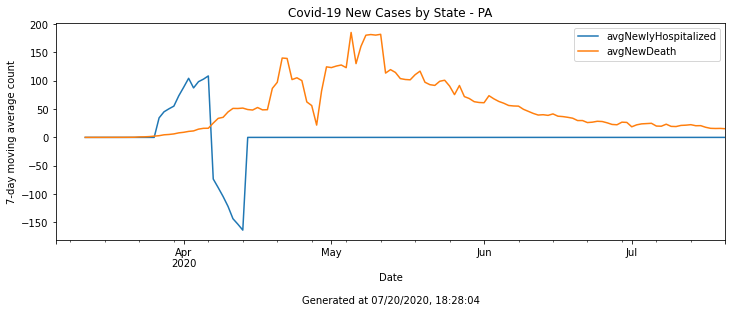

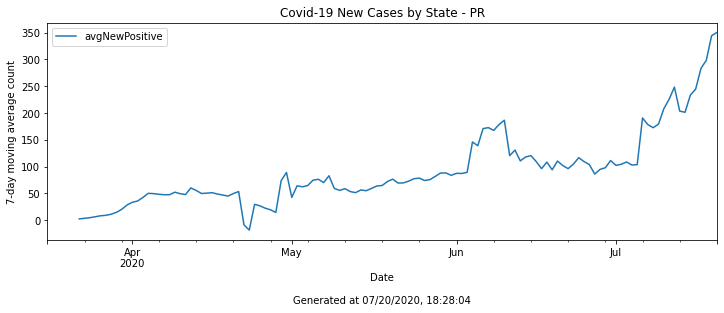

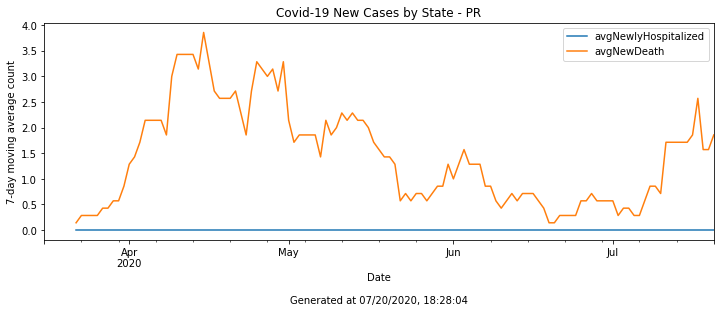

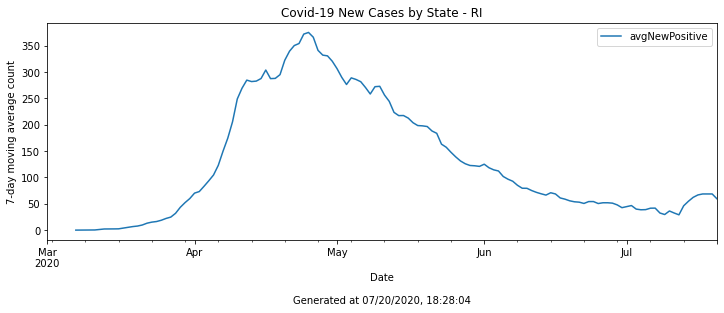

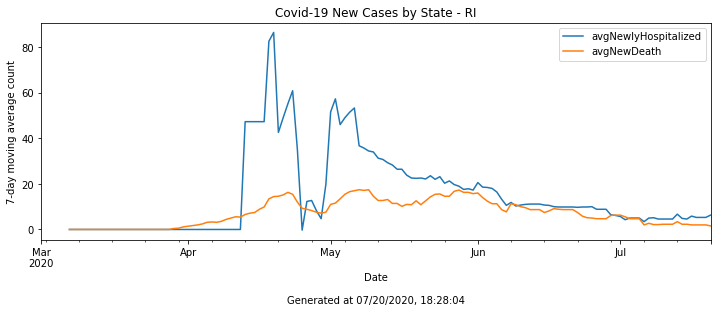

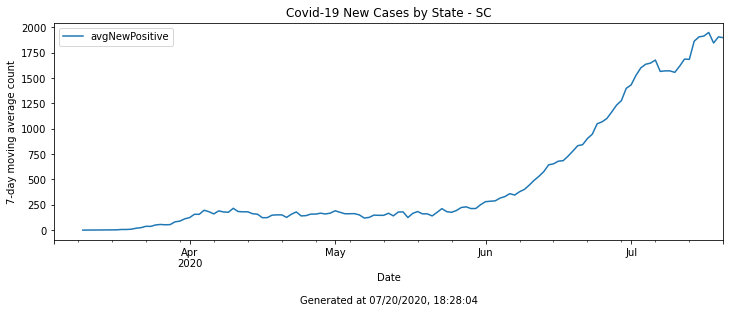

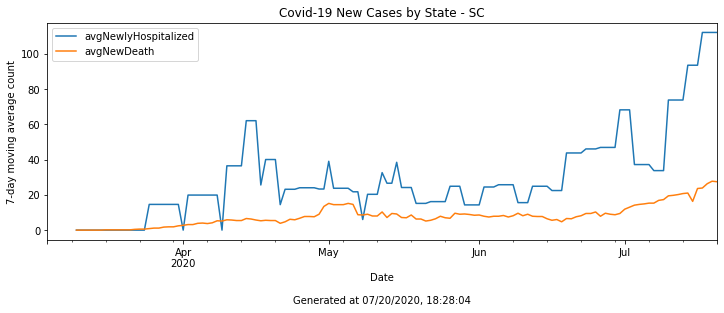

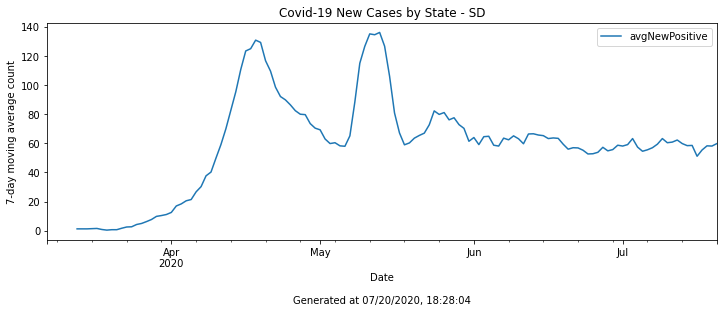

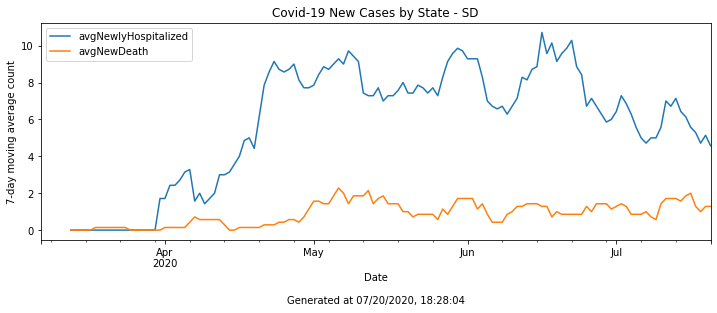

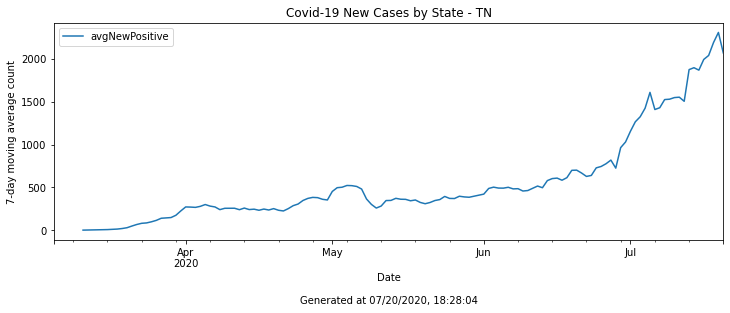

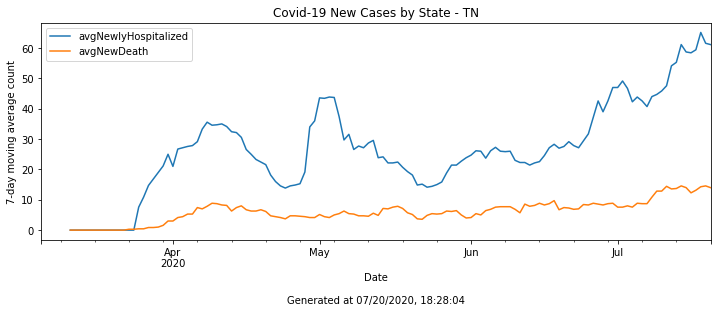

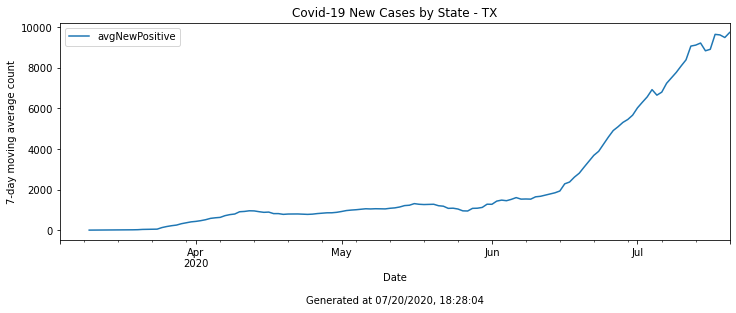

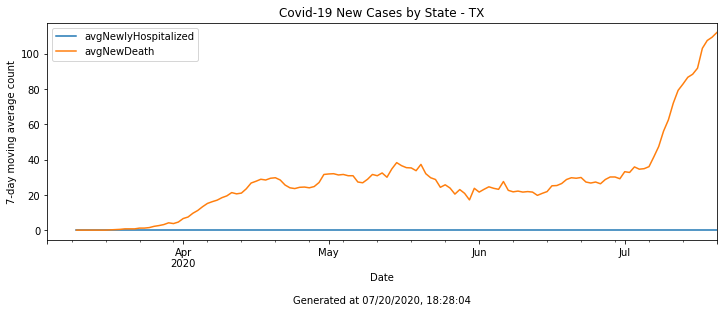

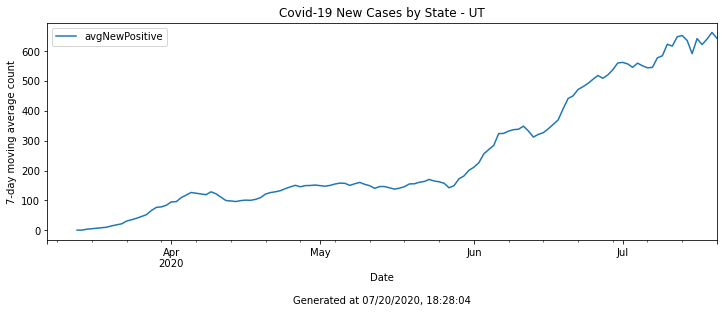

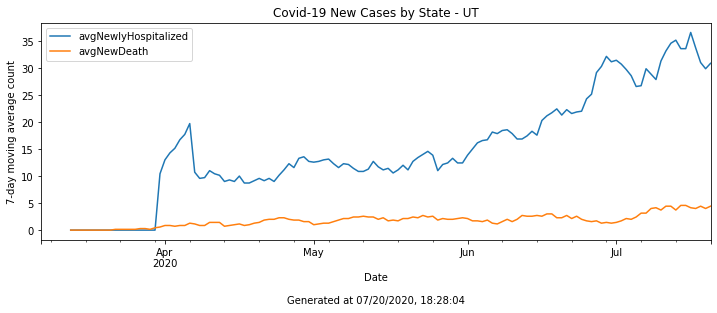

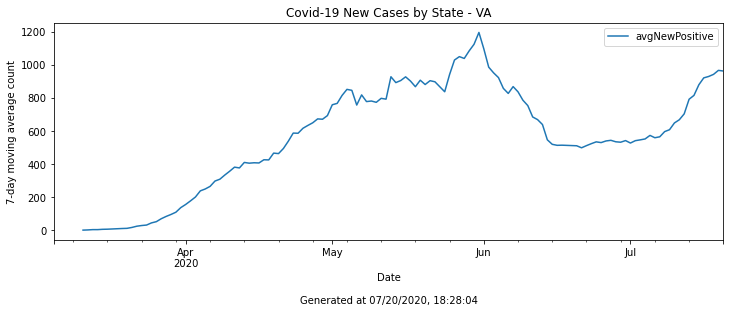

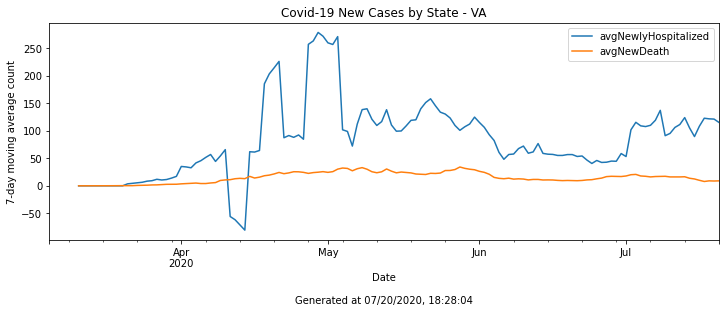

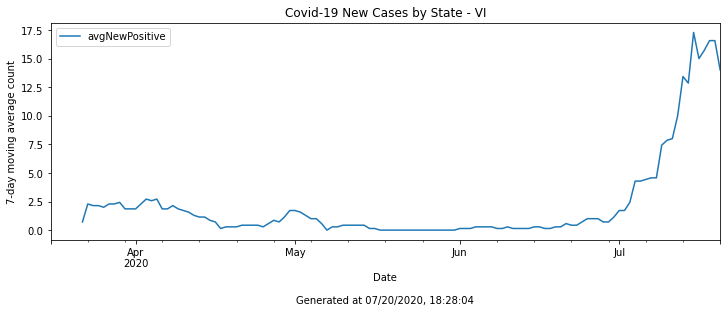

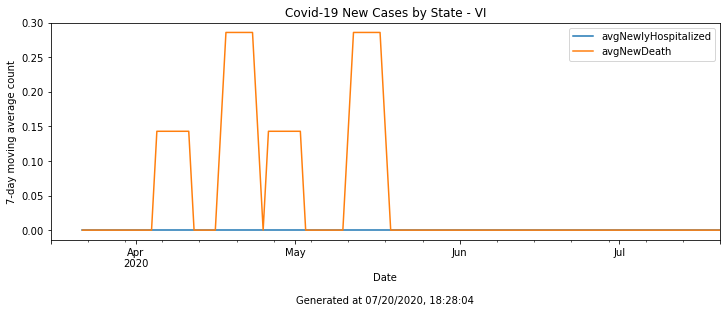

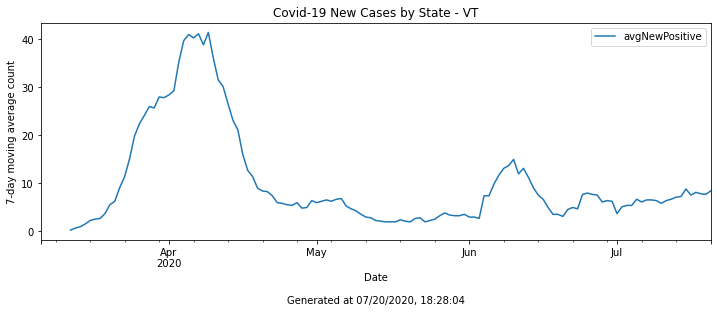

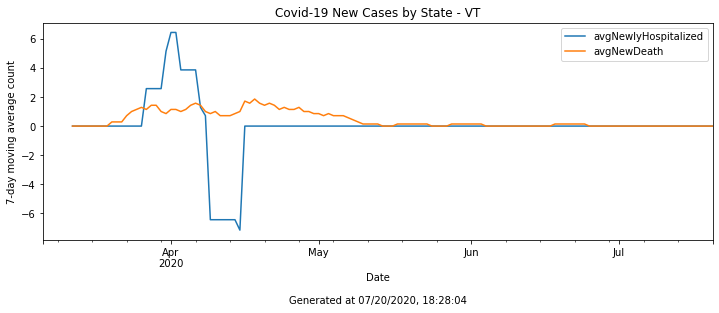

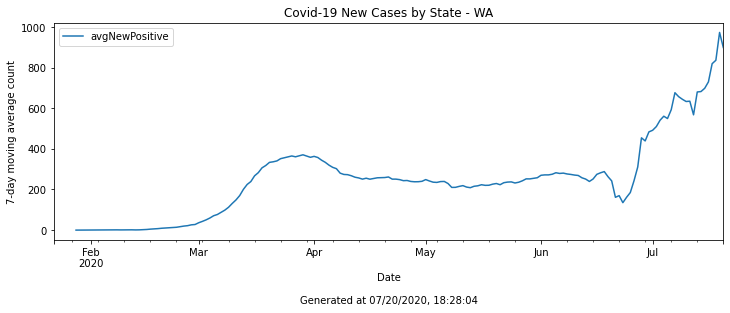

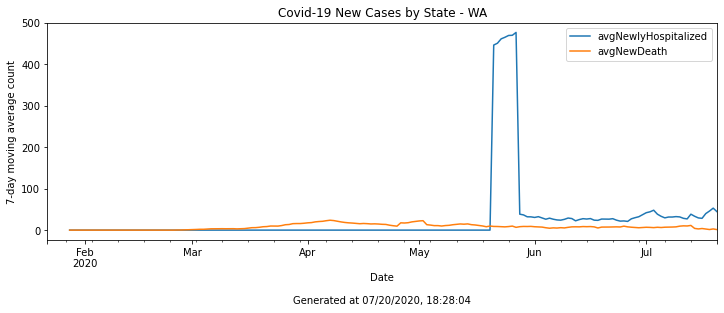

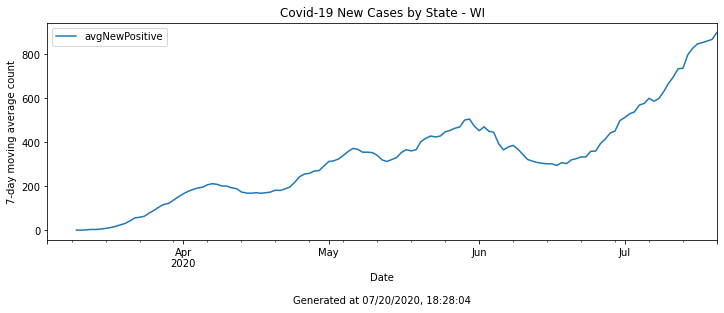

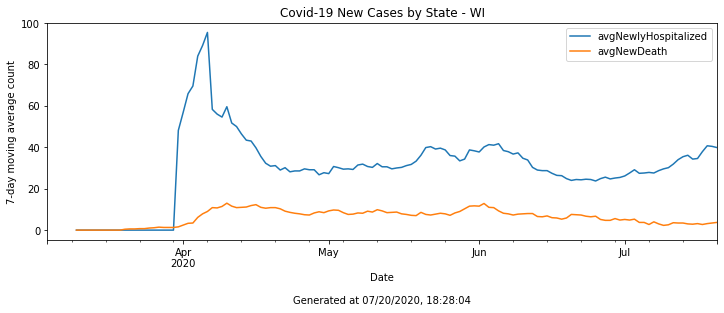

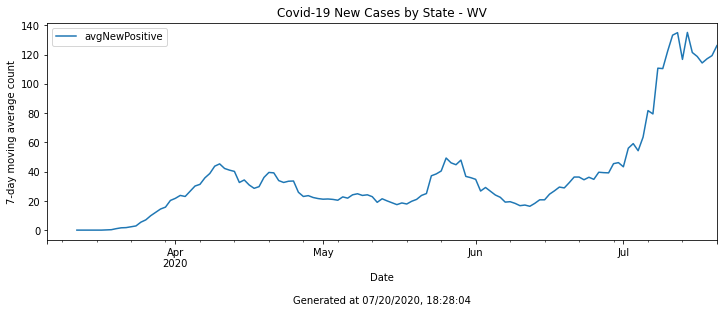

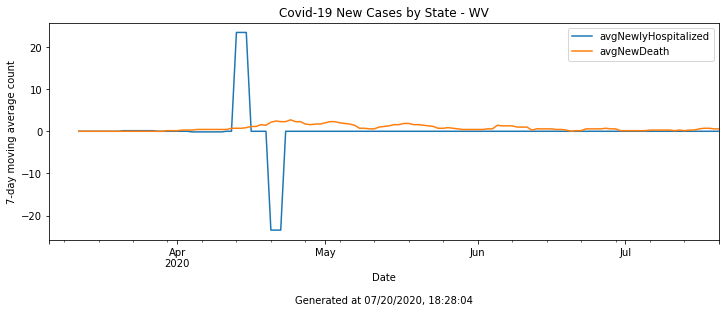

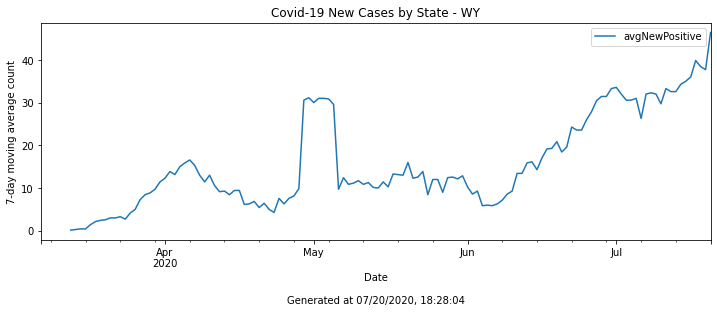

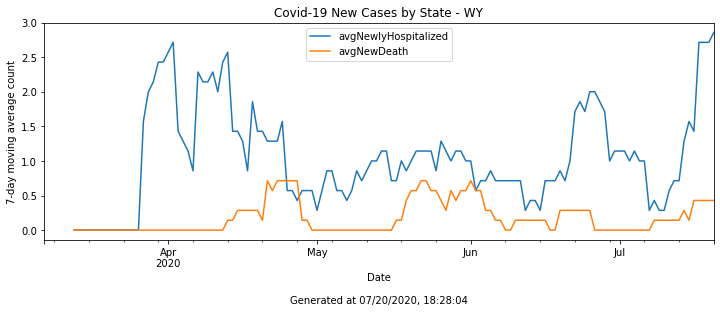

In [30]:
# This python program read daily covid data from website 
# States sometime missed to report covid data on certain dates
# The program uses moving average to address this issue
# Author:   John Zhao <johnzzhao@gmail.com>
# Created:  Monday July 20 09:07:24 2020-0500
#
# ID: covid_daily_report_by_state.py  $
 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# get current datetime string
datetime_str = datetime.now().strftime("%m/%d/%Y, %H:%M:%S")
 
# Covid-19 daily data for all states from the Covid Tracking Project
url = "https://covidtracking.com//api/v1/states/daily.csv"
data = pd.read_csv(url, sep=",")
state_data = data[['date', 'state', 'hospitalizedIncrease',
                   'deathIncrease', 'positiveIncrease']].copy()
state_data['date'] = pd.to_datetime(state_data['date'], format='%Y%m%d')
state_data = state_data.sort_values('state', ascending=True)
# get the list of states reported
state_list = state_data.state.unique()
 
# go over all states to generate line plots
plt.rcParams.update({'figure.max_open_warning': 0})
 
for name in state_list:
    cur_state_data = state_data.loc[state_data['state'] == name, :].copy()
    cur_state_data = cur_state_data.sort_values('date', ascending=True)
 
    # calculate weekly moving average
    cur_state_data['avgNewPositive'] = cur_state_data.iloc[:,4].rolling(window=7).mean()
    cur_state_data['avgNewlyHospitalized'] = cur_state_data.iloc[:, 2].rolling(window=7).mean()
    cur_state_data['avgNewDeath'] = cur_state_data.iloc[:,3].rolling(window=7).mean()
    cur_state_data = cur_state_data.set_index('date')
 
    # set report title
    plot_title = "Covid-19 New Cases by State - " + name
 
    report_data = cur_state_data[["avgNewPositive"]]
    ax = report_data.plot(title=plot_title, figsize=(12, 4))
    xlabel_str = "Date\n\n" + "Generated at " + datetime_str
    ax.set_xlabel(xlabel_str)
    ax.set_ylabel("7-day moving average count")
    plt.show()
 
    report_data = cur_state_data[["avgNewlyHospitalized", "avgNewDeath"]]
    ax = report_data.plot(title=plot_title, figsize=(12, 4))
    ax.set_xlabel(xlabel_str)
    ax.set_ylabel("7-day moving average count")
    plt.show()